<a href="https://colab.research.google.com/github/mariamarseliameres/202055202015-Maria/blob/master/tuagas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariameres","key":"075a79106e7c938d1fbf1d5550f849a7"}'}

In [4]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Apr 12 08:56 kaggle.json


In [5]:
!pip install -q kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           5709        219  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           1595         40  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           1789         40  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [10]:
!kaggle datasets download -d zalando-research/fashionmnist

 99% 68.0M/68.8M [00:02<00:00, 33.6MB/s]
100% 68.8M/68.8M [00:02<00:00, 24.4MB/s]


In [11]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow

In [32]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [34]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [35]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [36]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [37]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [38]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

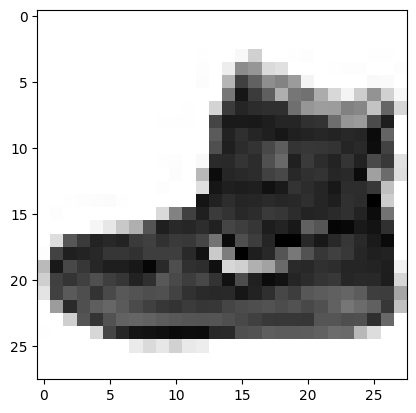

In [39]:
plt.imshow(X_train[0],cmap = 'Greys')

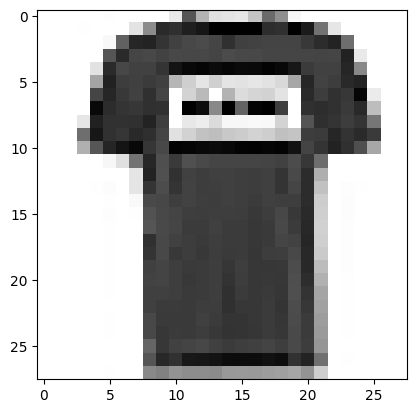

In [40]:
plt.imshow(X_train[1],cmap = 'Greys')

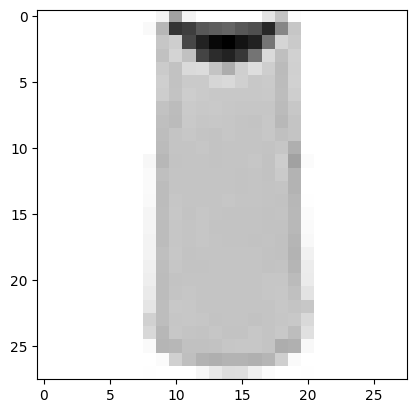

In [41]:
plt.imshow(X_train[2],cmap = 'Greys')

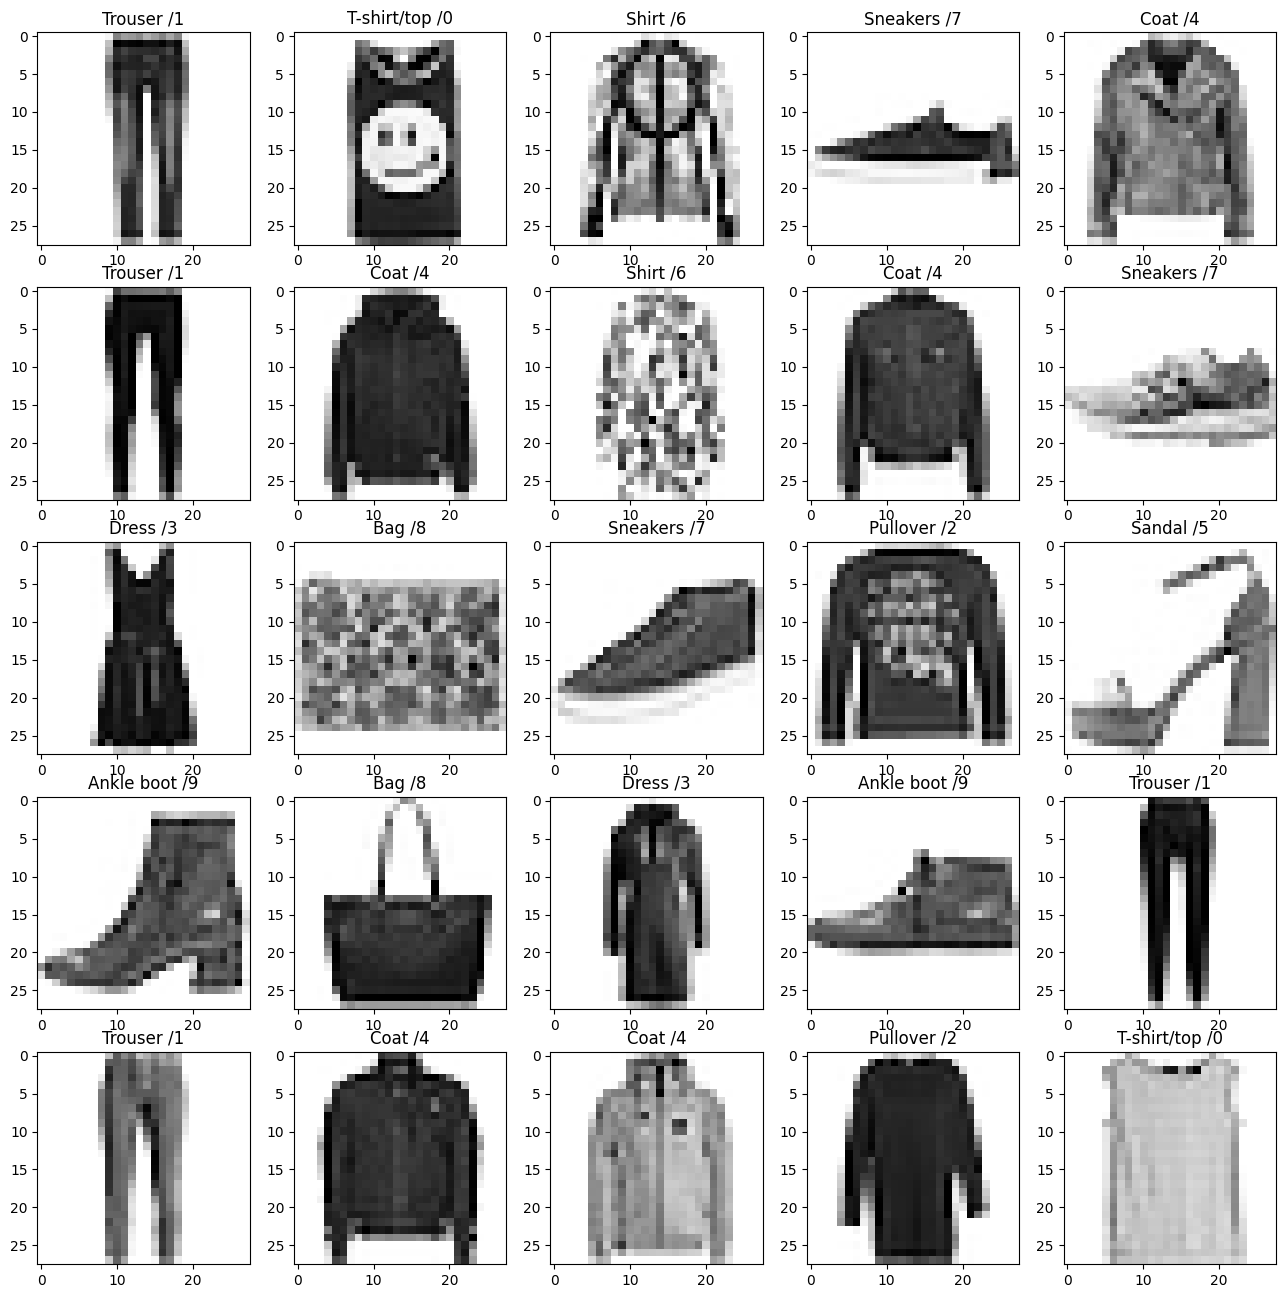

In [44]:
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.title('{} /{}'.format(class_labels[y_train[i]],y_train[i]))

In [45]:
X_train.ndim

3

In [46]:
X_train.shape

(60000, 28, 28)

In [47]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [48]:
X_train.ndim

4

In [49]:
X_train.shape

(60000, 28, 28, 1)

In [50]:
X_train = X_train/255
X_test = X_test/255

In [51]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [52]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2 , random_state = 2020)

In [56]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [57]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

In [58]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layerkeras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

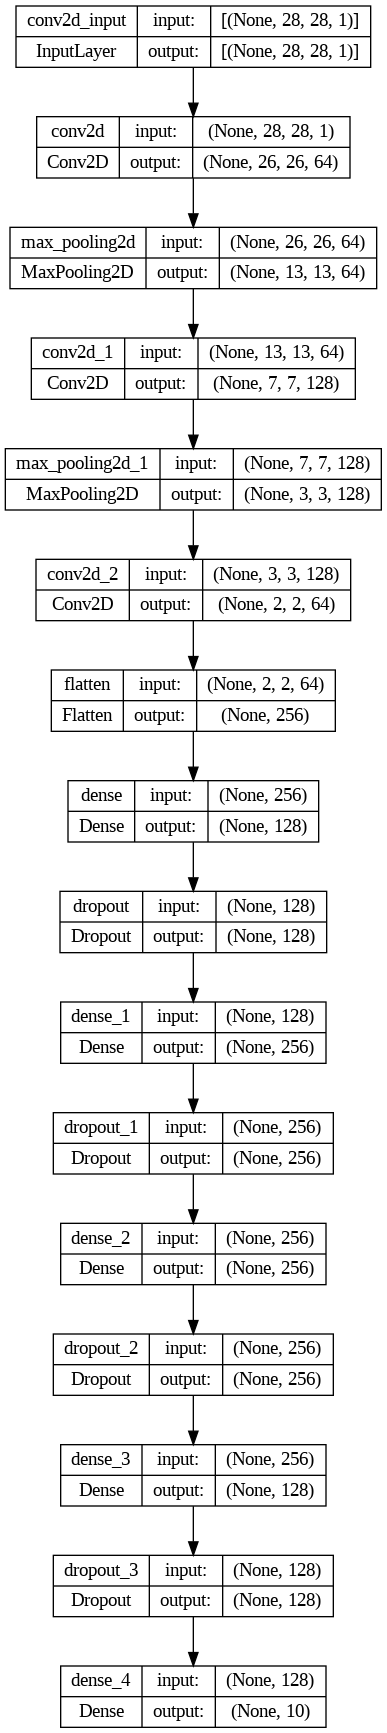

In [59]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 flatten (Flatten)           (None, 256)               0

In [61]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [62]:
model.fit(X_train,y_train,epochs = 20,batch_size = 512,verbose = 1, validation_data=(X_val,y_val))

Epoch 1/20
94/94 [==============================] - 87s 892ms/step - loss: 1.1720 - accuracy: 0.5403 - val_loss: 0.5952 - val_accuracy: 0.7701
Epoch 2/20
94/94 [==============================] - 87s 927ms/step - loss: 0.5908 - accuracy: 0.7779 - val_loss: 0.4994 - val_accuracy: 0.8078
Epoch 3/20
94/94 [==============================] - 86s 915ms/step - loss: 0.4818 - accuracy: 0.8234 - val_loss: 0.4107 - val_accuracy: 0.8504
Epoch 4/20
94/94 [==============================] - 81s 864ms/step - loss: 0.4237 - accuracy: 0.8491 - val_loss: 0.3728 - val_accuracy: 0.8668
Epoch 5/20
94/94 [==============================] - 85s 911ms/step - loss: 0.3736 - accuracy: 0.8656 - val_loss: 0.3456 - val_accuracy: 0.8771
Epoch 6/20
94/94 [==============================] - 80s 854ms/step - loss: 0.3339 - accuracy: 0.8805 - val_loss: 0.3156 - val_accuracy: 0.8868
Epoch 7/20
94/94 [==============================] - 82s 873ms/step - loss: 0.3130 - accuracy: 0.8878 - val_loss: 0.3039 - val_accuracy: 0.8889

In [63]:
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 166ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [64]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

1/1 [==============================] - 0s 30ms/step


9

In [65]:
y_test[0]

9

In [66]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 4s 14ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.17, 0.  , 0.  ]], dtype=float32)

In [67]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.2899 - accuracy: 0.9068


[0.2899191677570343, 0.9067999720573425]

<Axes: >

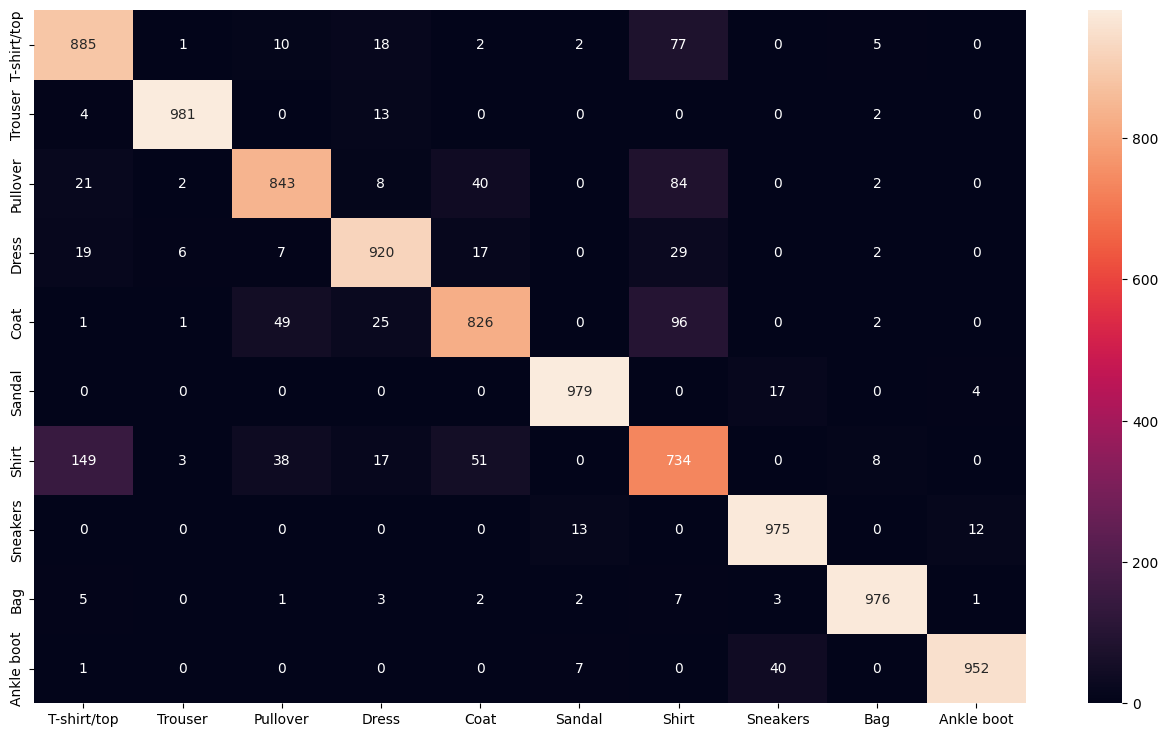

In [68]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

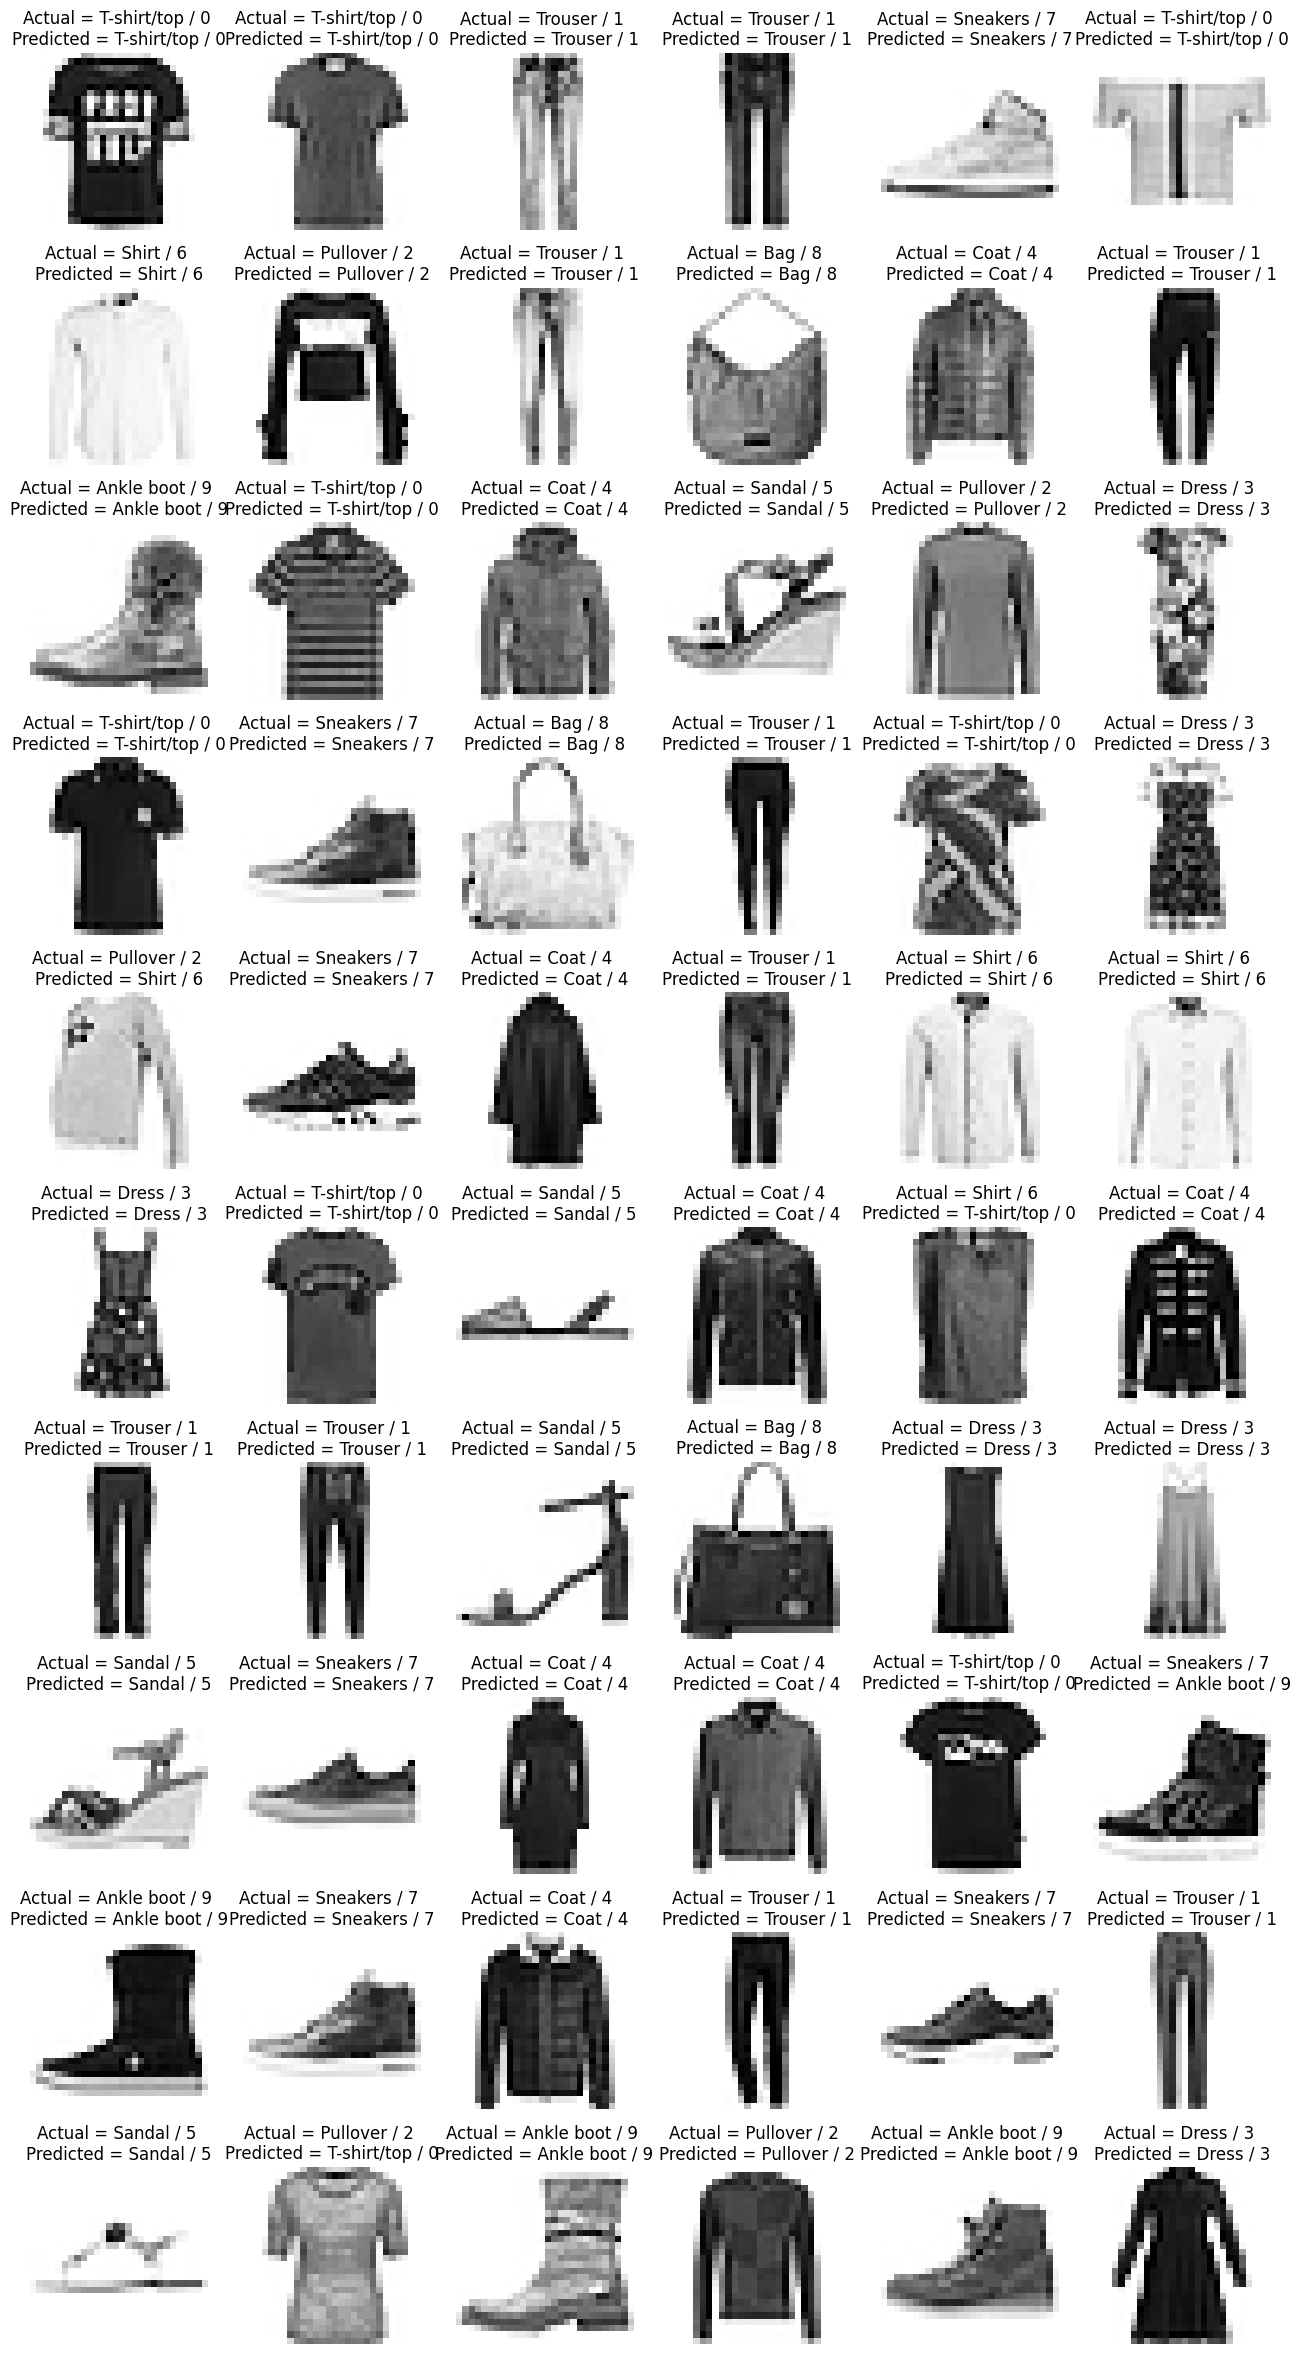

In [69]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [70]:
from sklearn.metrics import classification_report
cr = classification_report (y_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.89      0.84      0.87      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.88      0.83      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.71      0.73      0.72      1000
    Sneakers       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

